In [1]:
%matplotlib inline


Adding a background map to plots 
--------------------------------

This example shows how you can add a background basemap to plots created
with the geopandas ``.plot()`` method. This makes use of the
`contextily <https://github.com/darribas/contextily>`__ package to retrieve
web map tiles from several sources (OpenStreetMap, Stamen).

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html




In [2]:
# sphinx_gallery_thumbnail_number = 3
import geopandas

Let's use the NYC borough boundary data that is available in geopandas
datasets. Plotting this gives the following result:



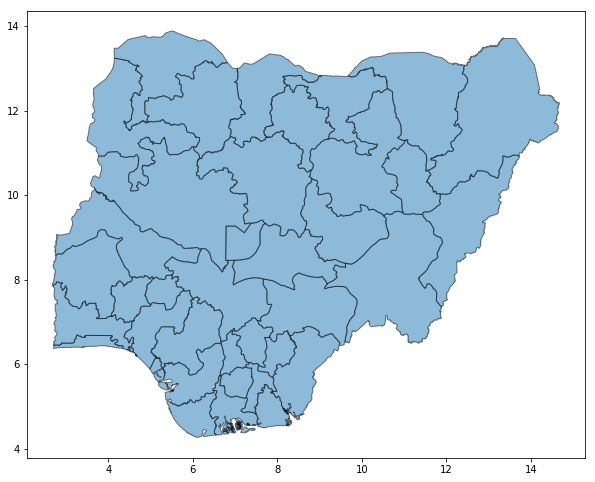

In [10]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
df = geopandas.read_file('/Users/knuttungland/src/Nigeria/data/Nigeriabound97.shp')
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Convert the data to Web Mercator
================================

Web map tiles are typically provided in
`Web Mercator <https://en.wikipedia.org/wiki/Web_Mercator>`__
(`EPSG 3857 <https://epsg.io/3857>`__), so we need to make sure to convert
our data first to the same CRS to combine our polygons and background tiles
in the same map:



In [11]:
df = df.to_crs(epsg=3857)

Contextily helper function
==========================

We define a small helper function that uses
`contextily <https://github.com/darribas/contextily>`__ to add a map
as background to an existing plot: 



In [12]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

find the min and max for the map


231196.99026780238 1700746.7611969553 421360.07190460054 1615373.4898509597


(231196.99026780238,
 1700746.7611969553,
 421360.07190460054,
 1615373.4898509597)

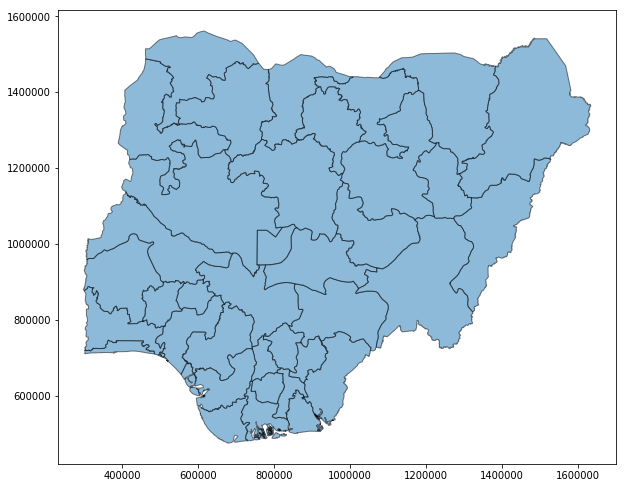

In [21]:
import contextily as ctx


ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
xmin, xmax, ymin, ymax = ax.axis()
print(xmin, xmax, ymin, ymax)
url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
zoom = 10
basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
ax.axis((xmin, xmax, ymin, ymax))

Add background tiles to plot
============================

Now we can use the above function to easily add a background map to our
plot. The `zoom` keyword is required and let's you specify the detail of the
map tiles (be careful to not specify a too high `zoom` level, as this can
result in a large download):



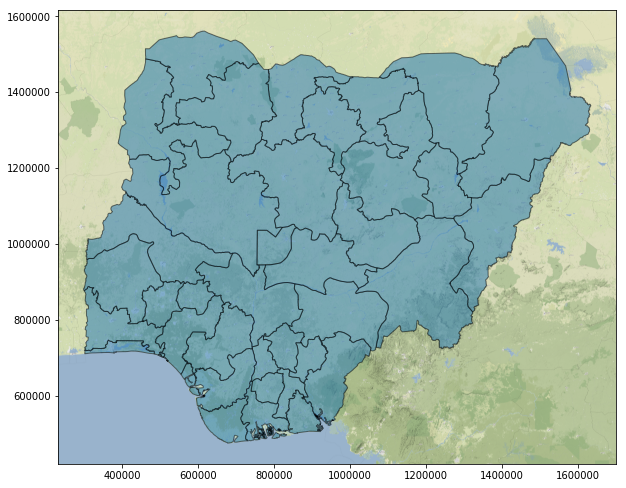

In [13]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=10)

By default, contextily uses the Stamen Terrain style. We can specify a
different style using ``ctx.sources``:



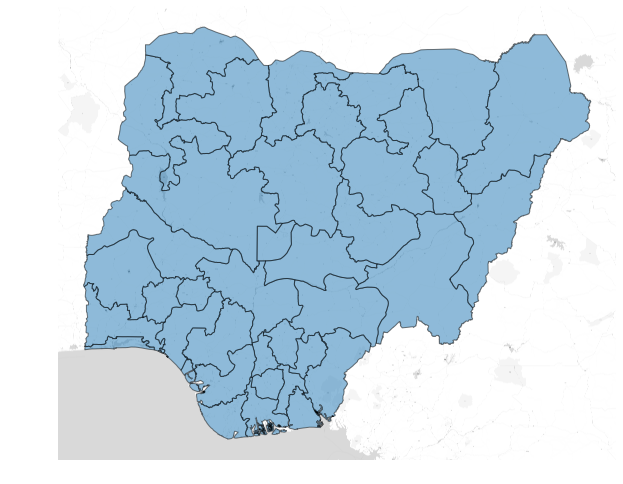

In [14]:
oil_states= ['Akwa Ibom','Delta','Rivers','Bayelsa','Ondo','Edo State','Imo','Abia']

oil_states_map = df[df['name'].isin(oil_states)]

ax = oil_states_map.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

In [15]:
lon = 6.067
lat = 4.324
x,y = ax(lon, lat)
ax.plot(x, y, 'bo', markersize=24)

TypeError: 'AxesSubplot' object is not callable